In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

import os
for dirname,_,flienames in os.walk('/data'):
    for fliename in filenames:
        print(os.path.join(dirname,filename))

import warnings
warnings.filterwarnings("ignore")


In [19]:
data_path = 'E:/resume projects/data/Automobile_data.csv'

df = pd.read_csv(data_path)

In [20]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [21]:
print(f"This dataset contain {df.shape[0]} rows and {df.shape[1]} columns.")

This dataset contain 205 rows and 26 columns.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [26]:
df.describe(include=["int64"])

,symboling,curb-weight,engine-size,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,2555.565854,126.907317,25.219512,30.751220
std,1.245307,520.680204,41.642693,6.542142,6.886443
min,-2.000000,1488.000000,61.000000,13.000000,16.000000
25%,0.000000,2145.000000,97.000000,19.000000,25.000000
50%,1.000000,2414.000000,120.000000,24.000000,30.000000
75%,2.000000,2935.000000,141.000000,30.000000,34.000000
max,3.000000,4066.000000,326.000000,49.000000,54.000000


In [27]:
df['price'].value_counts()

price
?        4
16500    2
6229     2
7609     2
7957     2
        ..
16845    1
19045    1
21485    1
22470    1
22625    1
Name: count, Length: 187, dtype: int64

In [28]:
df.replace('?',np.nan,inplace=True)

In [29]:
df['price'].value_counts()

price
16500    2
6229     2
7609     2
7957     2
6692     2
        ..
16845    1
19045    1
21485    1
22470    1
22625    1
Name: count, Length: 186, dtype: int64

In [30]:
empty = df.isnull().sum().reset_index(name='null_values')
print('null_values:')
for i, null_count in enumerate(empty['null_values']):
    if null_count>0:
        print(empty['index'][i], null_count)

null_values:
normalized-losses 41
num-of-doors 2
bore 4
stroke 4
horsepower 2
peak-rpm 2
price 4


In [31]:
n_l_mean = df['normalized-losses'].astype('float').mean(axis=0)
n_l_mean

np.float64(122.0)

In [32]:
df['normalized-losses'].fillna(n_l_mean, inplace=True)

In [33]:
df['num-of-doors'].value_counts(normalize=True)
df['num-of-doors'].fillna('four', inplace=True)

In [35]:
bore_mean = df['bore'].astype('float').mean(axis=0)
bore_mean= round(bore_mean,2)
bore_mean

np.float64(3.33)

In [36]:
df['bore'].fillna(bore_mean, inplace=True)

In [37]:
stroke_mean = df['stroke'].astype('float').mean()
stroke_mean = round(stroke_mean, 2)
stroke_mean

np.float64(3.26)

In [38]:
df['stroke'].fillna(stroke_mean, inplace=True)

In [40]:
hp_mean = df['horsepower'].astype('float').mean()
hp_mean = round(hp_mean,0)
hp_mean
df['horsepower'].fillna(hp_mean, inplace=True)

In [41]:
p_rpm_mean = df['peak-rpm'].astype('float').mean()
p_rpm_mean = round(p_rpm_mean,2)
df['peak-rpm'].fillna(p_rpm_mean, inplace=True)
p_rpm_mean

np.float64(5125.37)

In [42]:
df.dropna(subset='price',inplace=True)

In [43]:
float_dt = ['normalized-losses','bore','stroke']
int_dt = ['hasciiorsepower','peak-rpm','price']

for column in df.columns:
    if column in float_dt:
        df[column] = df[column].astype('float')
    elif column in int_dt:
        df[column] = df[column].astype('int')
        

In [44]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [45]:
df['city-l/100km'] = 235/df['city-mpg']
df['highway-l/100km'] = 235/df['highway-mpg']

In [46]:
df.drop(columns=['city-mpg', 'highway-mpg'], inplace=True)

In [47]:
df.describe()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,price,city-l/100km,highway-l/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330697,3.256965,10.164279,5117.661692,13207.129353,9.944145,8.044957
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,478.113747,7947.066342,2.534599,1.840739
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,4150.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,4800.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,5125.000000,10295.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,5500.000000,16500.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,6600.000000,45400.000000,18.076923,14.687500


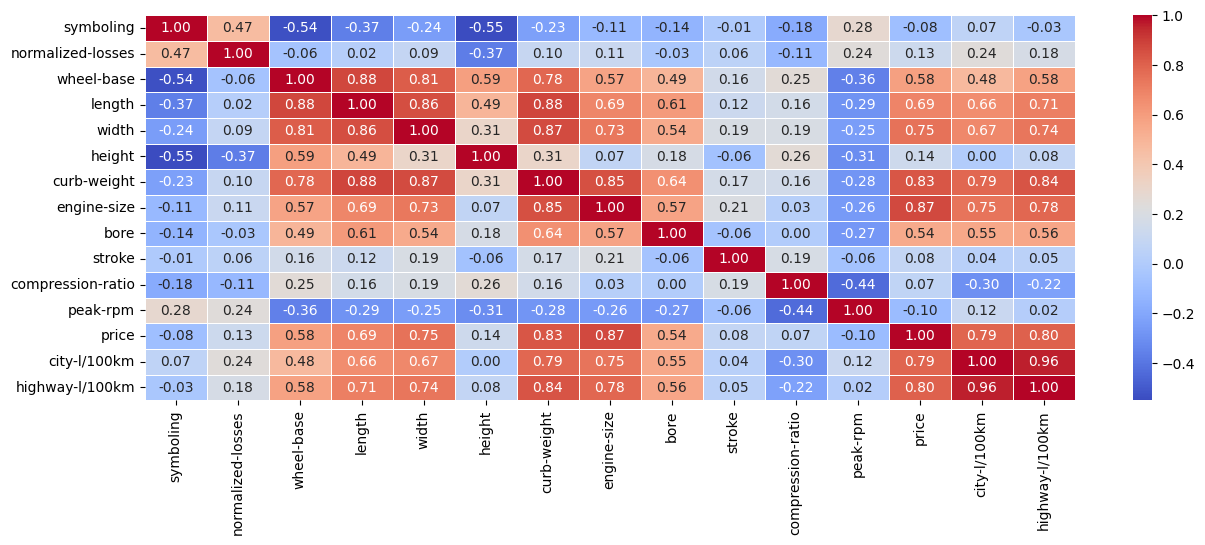

In [48]:
data_numeric = df.select_dtypes(include=['float64' , 'int64'])

corr_matrix = data_numeric.corr()

plt.figure(figsize=(15,5))

sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


In [49]:
corr_matrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,price,city-l/100km,highway-l/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139987,-0.007654,-0.182196,0.279739,-0.082391,0.066171,-0.029807
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029846,0.055299,-0.114713,0.239544,0.133999,0.238567,0.181189
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493234,0.157851,0.250313,-0.360301,0.584642,0.476153,0.577576
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608963,0.123830,0.159733,-0.285973,0.690628,0.657373,0.707108
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544884,0.188796,0.189867,-0.245803,0.751265,0.673363,0.736728
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180417,-0.061156,0.259737,-0.309971,0.135486,0.003811,0.084301
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644055,0.167357,0.156433,-0.279360,0.834415,0.785353,0.836921
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572585,0.205549,0.028889,-0.256734,0.872335,0.745059,0.783465
bore,-0.139987,-0.029846,0.493234,0.608963,0.544884,0.180417,0.644055,0.572585,1.000000,-0.055390,0.001260,-0.267361,0.543155,0.554640,0.559134
stroke,-0.007654,0.055299,0.157851,0.123830,0.188796,-0.061156,0.167357,0.205549,-0.055390,1.000000,0.187816,-0.063042,0.082262,0.036601,0.047430


In [50]:
df['fuel-type'].value_counts()
print(df.groupby('fuel-type')['price'].mean())


fuel-type
diesel    15838.15000
gas       12916.40884
Name: price, dtype: float64


In [52]:
df['drive-wheels'].value_counts()
df['engine-location'].value_counts()

engine-location
front    198
rear       3
Name: count, dtype: int64

In [51]:
print(df.groupby('engine-location')['price'].mean())

engine-location
front    12884.085859
rear     34528.000000
Name: price, dtype: float64


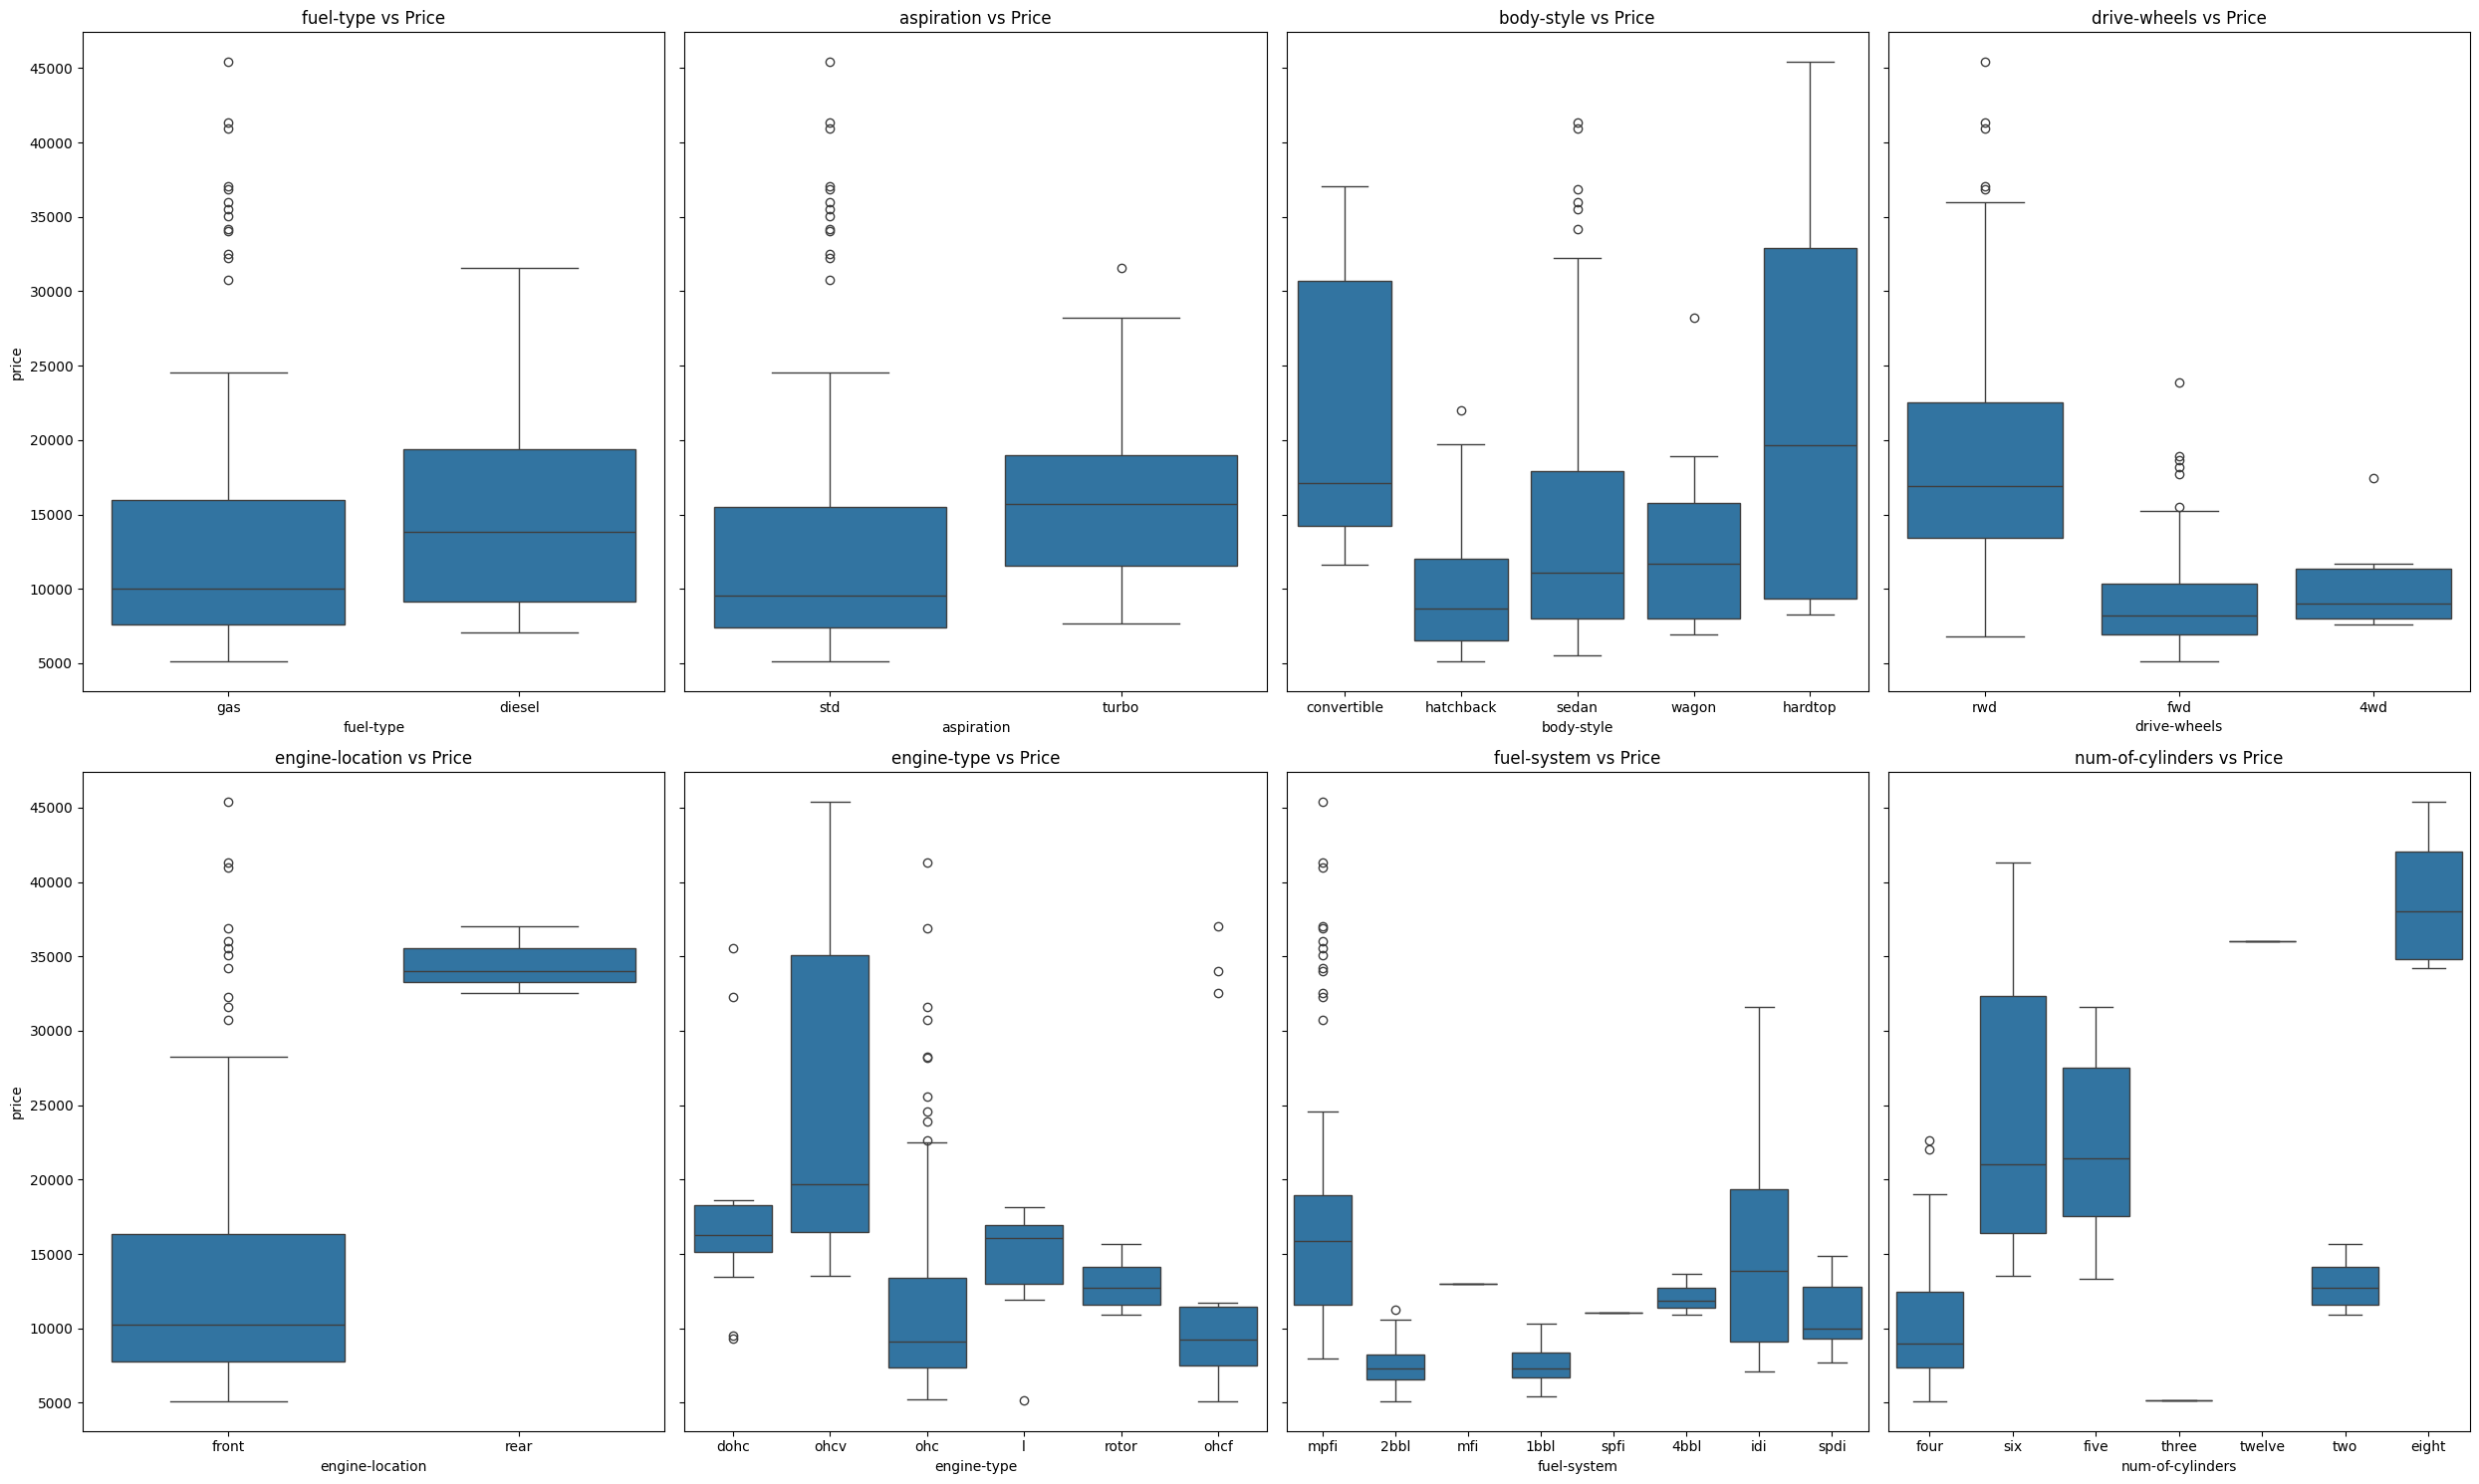

In [54]:
cat_variables = ['fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system', 'num-of-cylinders']

fig, ax = plt.subplots(2, 4, sharey=True, figsize=(25, 15))

for i, var in enumerate(cat_variables):
    row, col = divmod(i, 4)
    sns.boxplot(data=df, x=var, y='price', ax=ax[row][col])
    ax[row][col].set_title(f'{var} vs Price')

plt.tight_layout()
plt.show()

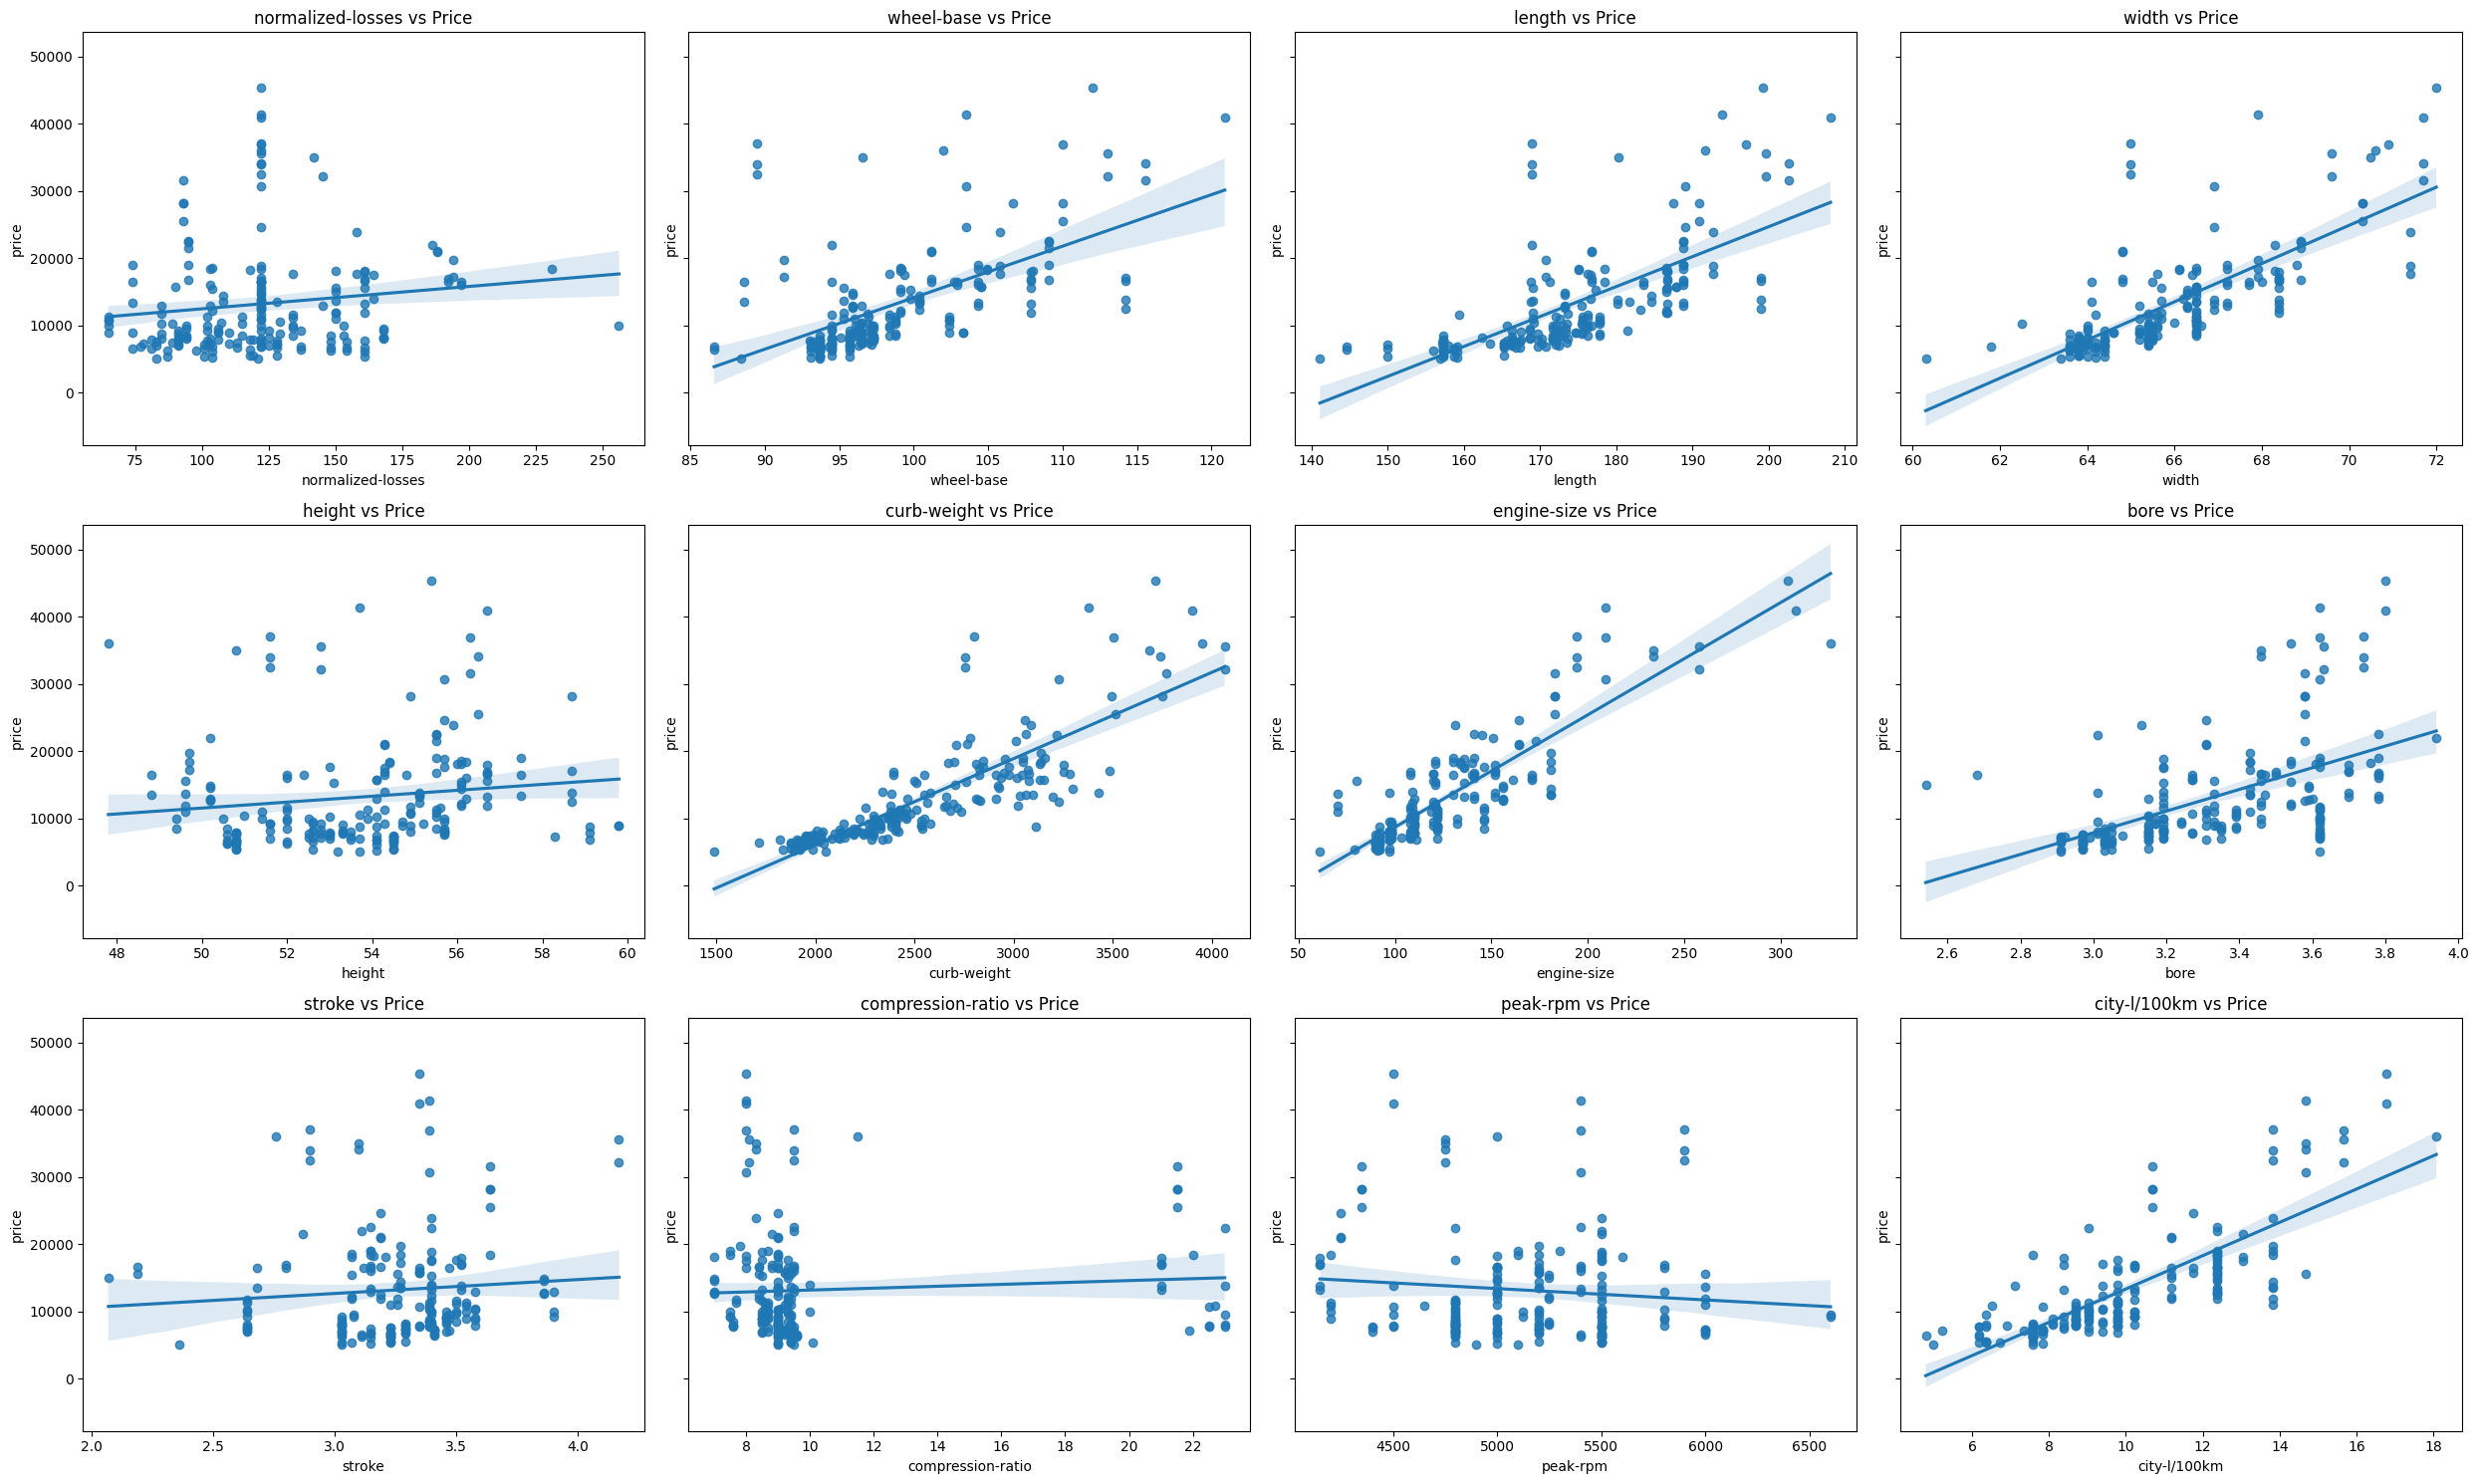

In [55]:
num_variables = [
    'normalized-losses', 'wheel-base', 'length', 'width',
    'height', 'curb-weight', 'engine-size', 'bore',
    'stroke', 'compression-ratio', 'peak-rpm', 'city-l/100km'
]


fig, ax = plt.subplots(3, 4, sharey=True, figsize=(25, 15))


for i, var in enumerate(num_variables):
    row,col = divmod(i,4)
    sns.regplot(data=df, x=var, y='price', ax=ax[row][col])
    ax[row][col].set_title(f'{var} vs Price')


plt.tight_layout()
plt.show()

In [56]:
from scipy import stats
for i in num_variables:
    person_coef,p_value = stats.pearsonr(df[i], df['price'])
    print(f"Pearson correlation between {i} and price: {person_coef}, p-value: {p_value}")

Pearson correlation between normalized-losses and price: 0.1339987342927434, p-value: 0.0578974935270312
Pearson correlation between wheel-base and price: 0.5846418222655081, p-value: 8.076488270732847e-20
Pearson correlation between length and price: 0.6906283804483642, p-value: 8.016477466158899e-30
Pearson correlation between width and price: 0.7512653440522674, p-value: 9.200335510481227e-38
Pearson correlation between height and price: 0.1354863075680597, p-value: 0.05514627325101242
Pearson correlation between curb-weight and price: 0.8344145257702845, p-value: 2.189577238893924e-53
Pearson correlation between engine-size and price: 0.8723351674455185, p-value: 9.26549162219869e-64
Pearson correlation between bore and price: 0.5431549770315166, p-value: 8.049696658365126e-17
Pearson correlation between stroke and price: 0.08226240854477475, p-value: 0.24565574524206166
Pearson correlation between compression-ratio and price: 0.07110732668194146, p-value: 0.3158110188729214
Pearso

In [57]:
person_coef,p_value = stats.pearsonr(df['highway-l/100km'], df['price'])
print(person_coef,p_value)

0.8011176263981976 3.046784581041069e-46


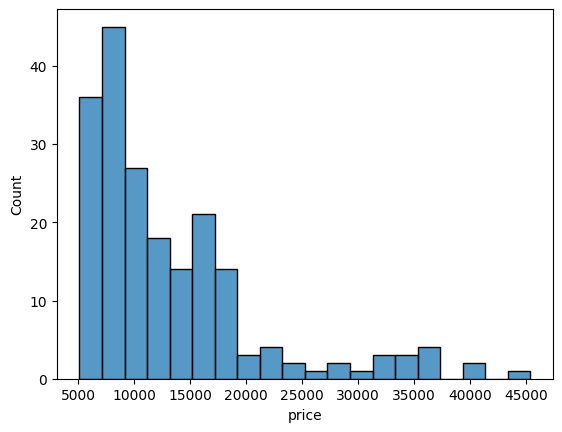

In [58]:
sns.histplot(data=df, x='price', bins=20)
plt.show()

In [60]:
df_prep = df[['length', 'width', 'curb-weight', 'engine-size', 'horsepower', 
              'city-l/100km', 'wheel-base', 'bore', 
              'drive-wheels', 'fuel-type', 'price']]

df_prep

,length,width,curb-weight,engine-size,horsepower,city-l/100km,wheel-base,bore,drive-wheels,fuel-type,price
0,168.8,64.1,2548,130,111,11.190476,88.6,3.47,rwd,gas,13495
1,168.8,64.1,2548,130,111,11.190476,88.6,3.47,rwd,gas,16500
2,171.2,65.5,2823,152,154,12.368421,94.5,2.68,rwd,gas,16500
3,176.6,66.2,2337,109,102,9.791667,99.8,3.19,fwd,gas,13950
4,176.6,66.4,2824,136,115,13.055556,99.4,3.19,4wd,gas,17450
...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,2952,141,114,10.217391,109.1,3.78,rwd,gas,16845
201,188.8,68.8,3049,141,160,12.368421,109.1,3.78,rwd,gas,19045
202,188.8,68.9,3012,173,134,13.055556,109.1,3.58,rwd,gas,21485
203,188.8,68.9,3217,145,106,9.038462,109.1,3.01,rwd,diesel,22470


Linear Regression Model development

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [62]:
cat_col = ['fuel-type', 'drive-wheels']

df_prep = pd.get_dummies(df_prep, columns=cat_col, drop_first=True).astype(int)

In [63]:
df_prep

,length,width,curb-weight,engine-size,horsepower,city-l/100km,wheel-base,bore,price,fuel-type_gas,drive-wheels_fwd,drive-wheels_rwd
0,168,64,2548,130,111,11,88,3,13495,1,0,1
1,168,64,2548,130,111,11,88,3,16500,1,0,1
2,171,65,2823,152,154,12,94,2,16500,1,0,1
3,176,66,2337,109,102,9,99,3,13950,1,1,0
4,176,66,2824,136,115,13,99,3,17450,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,188,68,2952,141,114,10,109,3,16845,1,0,1
201,188,68,3049,141,160,12,109,3,19045,1,0,1
202,188,68,3012,173,134,13,109,3,21485,1,0,1
203,188,68,3217,145,106,9,109,3,22470,0,0,1


In [64]:
scaler = StandardScaler()

df_prep_scaled = scaler.fit_transform(df_prep)

In [65]:
X = df_prep.drop(columns=['price'])
y = df_prep['price']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [67]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [68]:
y_pred = lr.predict(X_test)

In [69]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 3683.2860566535473
Mean Squared Error: 28201329.688863985
R-squared: 0.7694967429193744


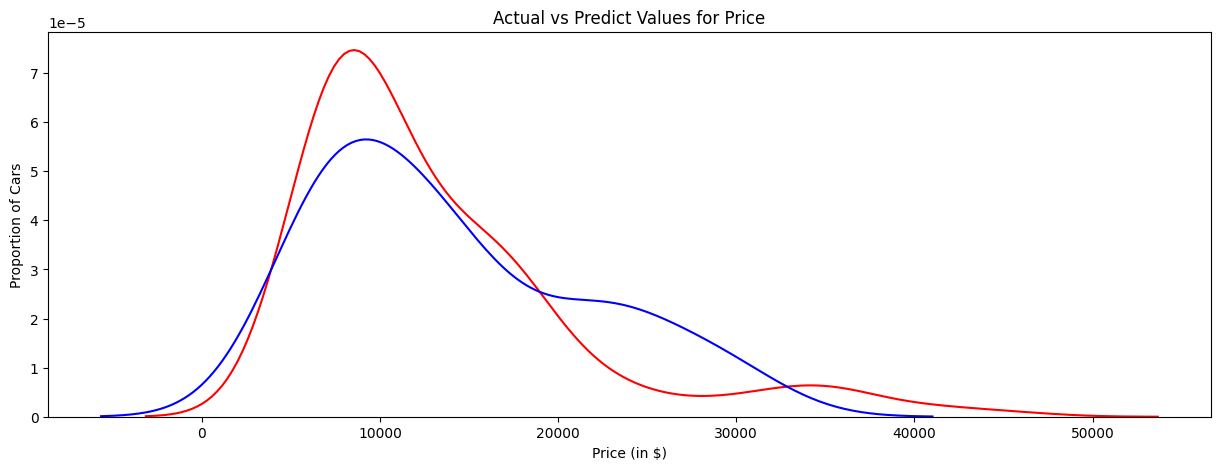

In [70]:
plt.figure(figsize=(15,5))

ax1 = sns.distplot(df['price'], color='r', hist=False, label='Actual Value')
sns.distplot(y_pred, color='b', hist=False, label='Predict Value', ax=ax1 )

plt.title('Actual vs Predict Values for Price')
plt.xlabel('Price (in $)')
plt.ylabel('Proportion of Cars')
plt.show()